In [1]:
from keras.layers import Input, Dense
from keras.models import Model
import matplotlib.pyplot as plt
from keras.datasets import mnist
import numpy as np
from keras.datasets import cifar10
import cv2

In [3]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

In [4]:
# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

2022-03-31 23:28:10.850777: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
(x_train, _), (x_test, _) = mnist.load_data()

In [6]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print (x_train.shape)
print (x_test.shape)

(60000, 784)
(10000, 784)


<h4> Trying with different number of epochs

Epoch 1/5
235/235 [==============================] - 1s 4ms/step - loss: 0.2745 - val_loss: 0.1885
Epoch 2/5
235/235 [==============================] - 1s 4ms/step - loss: 0.1698 - val_loss: 0.1528
Epoch 3/5
235/235 [==============================] - 1s 4ms/step - loss: 0.1445 - val_loss: 0.1348
Epoch 4/5
235/235 [==============================] - 1s 4ms/step - loss: 0.1298 - val_loss: 0.1226
Epoch 5/5
235/235 [==============================] - 1s 4ms/step - loss: 0.1194 - val_loss: 0.1140


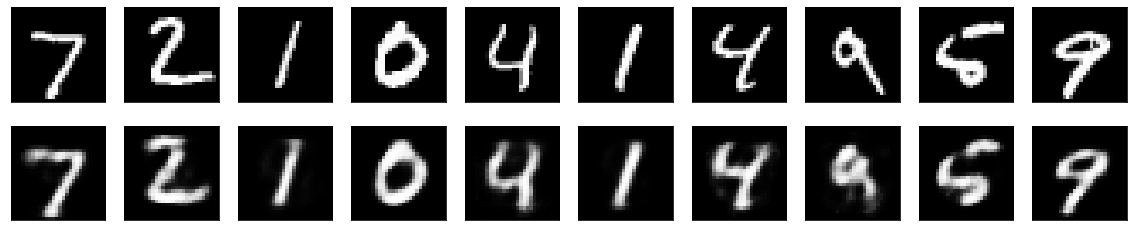

Epoch 1/10
235/235 [==============================] - 1s 5ms/step - loss: 0.1121 - val_loss: 0.1080
Epoch 2/10
235/235 [==============================] - 1s 4ms/step - loss: 0.1069 - val_loss: 0.1036
Epoch 3/10
235/235 [==============================] - 1s 4ms/step - loss: 0.1031 - val_loss: 0.1003
Epoch 4/10
235/235 [==============================] - 1s 4ms/step - loss: 0.1003 - val_loss: 0.0979
Epoch 5/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0983 - val_loss: 0.0962
Epoch 6/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0969 - val_loss: 0.0951
Epoch 7/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0960 - val_loss: 0.0942
Epoch 8/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0953 - val_loss: 0.0939
Epoch 9/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0949 - val_loss: 0.0933
Epoch 10/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0945 - val_loss: 0.0930

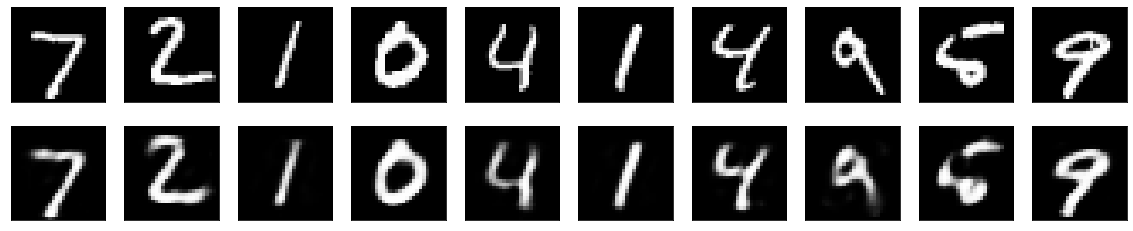

Epoch 1/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0942 - val_loss: 0.0929
Epoch 2/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0940 - val_loss: 0.0926
Epoch 3/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0938 - val_loss: 0.0926
Epoch 4/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0937 - val_loss: 0.0924
Epoch 5/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0936 - val_loss: 0.0922
Epoch 6/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0934 - val_loss: 0.0922
Epoch 7/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0934 - val_loss: 0.0920
Epoch 8/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0933 - val_loss: 0.0920
Epoch 9/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0932 - val_loss: 0.0920
Epoch 10/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0932 - val_loss: 0.0919

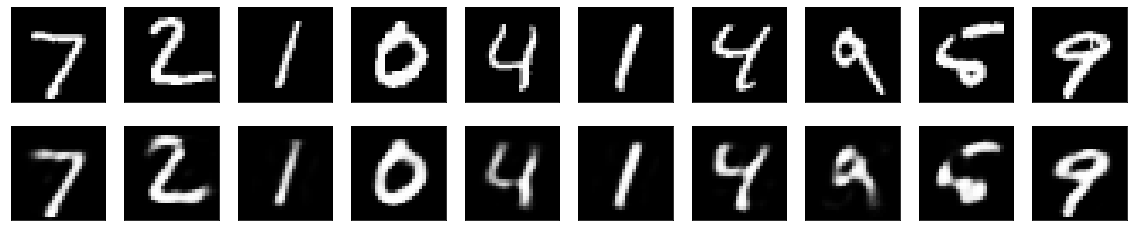

Epoch 1/30
235/235 [==============================] - 1s 4ms/step - loss: 0.0928 - val_loss: 0.0916
Epoch 2/30
235/235 [==============================] - 1s 4ms/step - loss: 0.0927 - val_loss: 0.0916
Epoch 3/30
235/235 [==============================] - 1s 4ms/step - loss: 0.0927 - val_loss: 0.0916
Epoch 4/30
235/235 [==============================] - 1s 4ms/step - loss: 0.0927 - val_loss: 0.0916
Epoch 5/30
235/235 [==============================] - 1s 5ms/step - loss: 0.0927 - val_loss: 0.0915
Epoch 6/30
235/235 [==============================] - 1s 4ms/step - loss: 0.0927 - val_loss: 0.0915
Epoch 7/30
235/235 [==============================] - 1s 4ms/step - loss: 0.0927 - val_loss: 0.0915
Epoch 8/30
235/235 [==============================] - 1s 3ms/step - loss: 0.0926 - val_loss: 0.0915
Epoch 9/30
235/235 [==============================] - 1s 3ms/step - loss: 0.0926 - val_loss: 0.0915
Epoch 10/30
235/235 [==============================] - 1s 3ms/step - loss: 0.0926 - val_loss: 0.0915

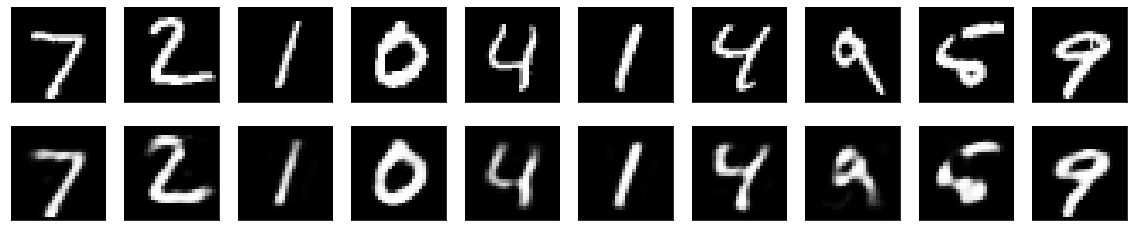

Epoch 1/40
235/235 [==============================] - 1s 3ms/step - loss: 0.0924 - val_loss: 0.0913
Epoch 2/40
235/235 [==============================] - 1s 3ms/step - loss: 0.0924 - val_loss: 0.0913
Epoch 3/40
235/235 [==============================] - 1s 3ms/step - loss: 0.0924 - val_loss: 0.0912
Epoch 4/40
235/235 [==============================] - 1s 3ms/step - loss: 0.0923 - val_loss: 0.0913
Epoch 5/40
235/235 [==============================] - 1s 3ms/step - loss: 0.0924 - val_loss: 0.0913
Epoch 6/40
235/235 [==============================] - 1s 3ms/step - loss: 0.0923 - val_loss: 0.0913
Epoch 7/40
235/235 [==============================] - 1s 3ms/step - loss: 0.0923 - val_loss: 0.0912
Epoch 8/40
235/235 [==============================] - 1s 3ms/step - loss: 0.0923 - val_loss: 0.0912
Epoch 9/40
235/235 [==============================] - 1s 3ms/step - loss: 0.0923 - val_loss: 0.0913
Epoch 10/40
235/235 [==============================] - 1s 3ms/step - loss: 0.0923 - val_loss: 0.0912

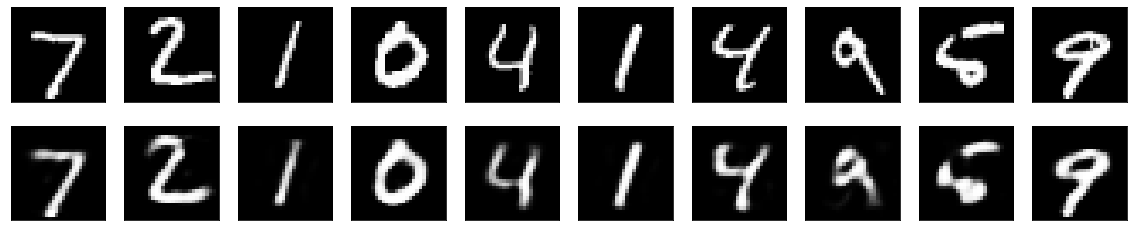

Epoch 1/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0921 - val_loss: 0.0910
Epoch 2/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0921 - val_loss: 0.0911
Epoch 3/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0921 - val_loss: 0.0911
Epoch 4/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0921 - val_loss: 0.0912
Epoch 5/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0921 - val_loss: 0.0910
Epoch 6/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0921 - val_loss: 0.0910
Epoch 7/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0920 - val_loss: 0.0910
Epoch 8/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0920 - val_loss: 0.0910
Epoch 9/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0920 - val_loss: 0.0910
Epoch 10/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0920 - val_loss: 0.0910

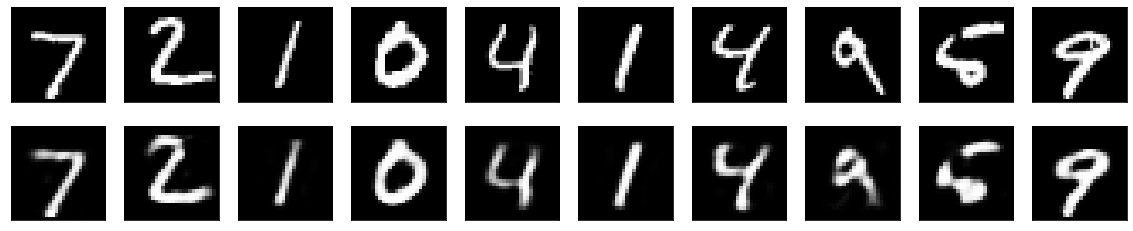

Epoch 1/100
235/235 [==============================] - 1s 3ms/step - loss: 0.0919 - val_loss: 0.0909
Epoch 2/100
235/235 [==============================] - 1s 3ms/step - loss: 0.0918 - val_loss: 0.0909
Epoch 3/100
235/235 [==============================] - 1s 3ms/step - loss: 0.0918 - val_loss: 0.0908
Epoch 4/100
235/235 [==============================] - 1s 3ms/step - loss: 0.0918 - val_loss: 0.0908
Epoch 5/100
235/235 [==============================] - 1s 3ms/step - loss: 0.0918 - val_loss: 0.0909
Epoch 6/100
235/235 [==============================] - 1s 3ms/step - loss: 0.0918 - val_loss: 0.0909
Epoch 7/100
235/235 [==============================] - 1s 3ms/step - loss: 0.0918 - val_loss: 0.0908
Epoch 8/100
235/235 [==============================] - 1s 3ms/step - loss: 0.0918 - val_loss: 0.0908
Epoch 9/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0918 - val_loss: 0.0908
Epoch 10/100
235/235 [==============================] - 1s 3ms/step - loss: 0.0918 - val_lo

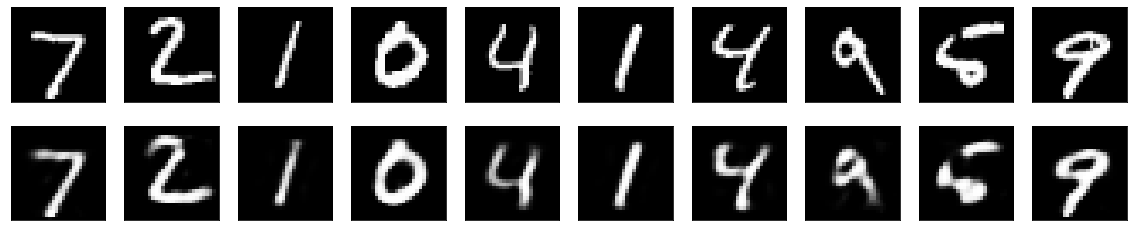

In [43]:
epochs_list = [5, 10, 20, 30, 40, 50, 100]
for epoch in epochs_list:
    autoencoder.fit(x_train, x_train,
                    epochs=epoch,
                    batch_size=256,
                    shuffle=True,
                    validation_data=(x_test, x_test))

    # encode and decode some digits
    # note that we take them from the *test* set
    encoded_imgs = encoder.predict(x_test)
    decoded_imgs = decoder.predict(encoded_imgs)

    n = 10  # how many digits we will display
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # display original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x_test[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # display reconstruction
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_imgs[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

<h4> Trying with more number of layers and keeping the epoch size = 5

In [37]:
# this is our input placeholder
input_img = Input(shape=(784,))
    # "encoded" is the encoded representation of the input
encoded = Dense(64, activation='relu')(input_img)
encoded = Dense(encoding_dim, activation='relu')(encoded)
    # "decoded" is the lossy reconstruction of the input
decoded = Dense(64, activation='sigmoid')(encoded)
decoded = Dense(784, activation='sigmoid')(decoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
#decoder = Model(encoded_input, decoder_layer(encoded_input))
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [38]:
(x_train, _), (x_test, _) = mnist.load_data()

In [39]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print (x_train.shape)
print (x_test.shape)

(60000, 784)
(10000, 784)


Epoch 1/5
235/235 [==============================] - 1s 5ms/step - loss: 0.3062 - val_loss: 0.2622
Epoch 2/5
235/235 [==============================] - 1s 5ms/step - loss: 0.2573 - val_loss: 0.2505
Epoch 3/5
235/235 [==============================] - 1s 5ms/step - loss: 0.2450 - val_loss: 0.2360
Epoch 4/5
235/235 [==============================] - 1s 5ms/step - loss: 0.2268 - val_loss: 0.2169
Epoch 5/5
235/235 [==============================] - 1s 5ms/step - loss: 0.2106 - val_loss: 0.2031


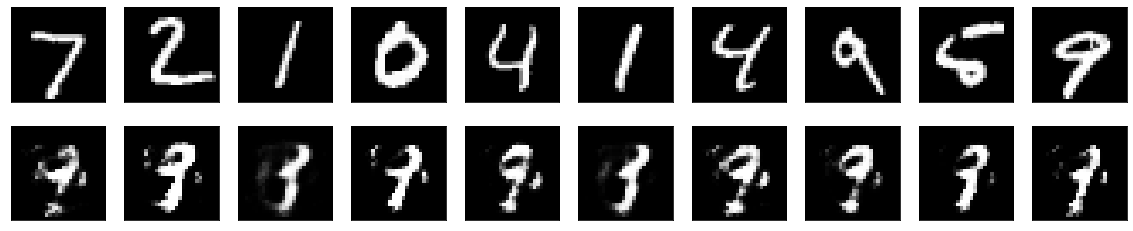

In [40]:
autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [41]:
# this is our input placeholder
input_img = Input(shape=(784,))
    # "encoded" is the encoded representation of the input
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(encoding_dim, activation='relu')(encoded)
    # "decoded" is the lossy reconstruction of the input
decoded = Dense(64, activation='sigmoid')(encoded)
decoded = Dense(128, activation='sigmoid')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
# decoder = Model(encoded_input, decoder_layer(encoded_input))
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [62]:
(x_train, _), (x_test, _) = mnist.load_data()

In [63]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print (x_train.shape)
print (x_test.shape)

(60000, 784)
(10000, 784)


Epoch 1/5
235/235 [==============================] - 2s 6ms/step - loss: 0.2917 - val_loss: 0.2633
Epoch 2/5
235/235 [==============================] - 1s 6ms/step - loss: 0.2629 - val_loss: 0.2608
Epoch 3/5
235/235 [==============================] - 1s 6ms/step - loss: 0.2516 - val_loss: 0.2442
Epoch 4/5
235/235 [==============================] - 2s 7ms/step - loss: 0.2424 - val_loss: 0.2387
Epoch 5/5
235/235 [==============================] - 1s 6ms/step - loss: 0.2305 - val_loss: 0.2181


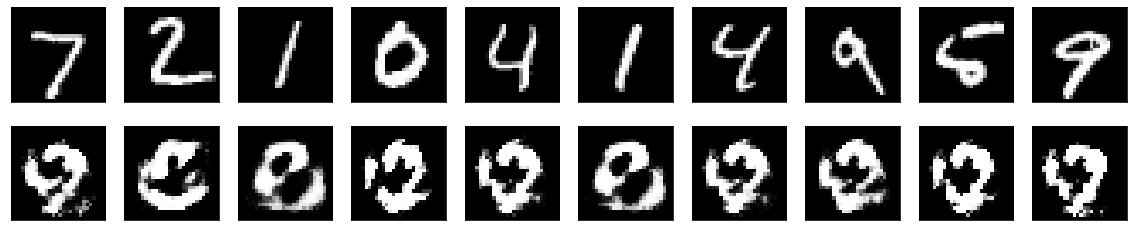

In [44]:
autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [45]:
# this is our input placeholder
input_img = Input(shape=(784,))
    # "encoded" is the encoded representation of the input
encoded = Dense(256, activation='relu')(input_img)
encoded = Dense(128, activation='relu')(encoded)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(encoding_dim, activation='relu')(encoded)
    # "decoded" is the lossy reconstruction of the input
decoded = Dense(64, activation='sigmoid')(encoded)
decoded = Dense(128, activation='sigmoid')(decoded)
decoded = Dense(256, activation='sigmoid')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
# decoder = Model(encoded_input, decoder_layer(encoded_input))
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [46]:
(x_train, _), (x_test, _) = mnist.load_data()

In [60]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print (x_train.shape)
print (x_test.shape)

(50000, 1024)
(10000, 1024)


Epoch 1/5
235/235 [==============================] - 3s 11ms/step - loss: 0.2761 - val_loss: 0.2515
Epoch 2/5
235/235 [==============================] - 2s 10ms/step - loss: 0.2435 - val_loss: 0.2385
Epoch 3/5
235/235 [==============================] - 2s 10ms/step - loss: 0.2360 - val_loss: 0.2287
Epoch 4/5
235/235 [==============================] - 2s 9ms/step - loss: 0.2193 - val_loss: 0.2076
Epoch 5/5
235/235 [==============================] - 2s 9ms/step - loss: 0.2023 - val_loss: 0.1968


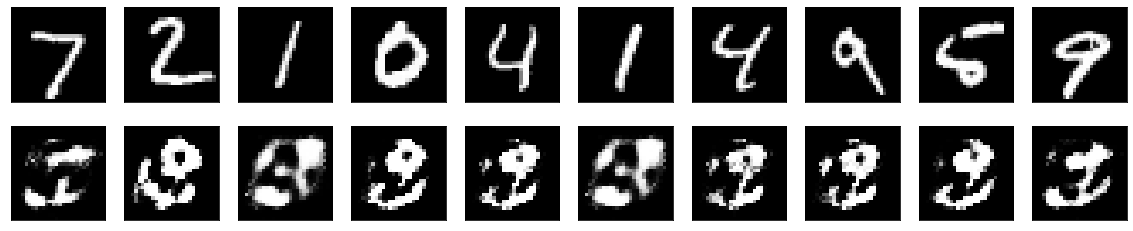

In [48]:
autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [49]:
# this is our input placeholder
input_img = Input(shape=(784,))
    # "encoded" is the encoded representation of the input
encoded = Dense(512, activation='relu')(input_img)
encoded = Dense(256, activation='relu')(encoded)
encoded = Dense(128, activation='relu')(encoded)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(encoding_dim, activation='relu')(encoded)
    # "decoded" is the lossy reconstruction of the input
decoded = Dense(64, activation='sigmoid')(encoded)
decoded = Dense(128, activation='sigmoid')(decoded)
decoded = Dense(256, activation='sigmoid')(decoded)
decoded = Dense(512, activation='sigmoid')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
# decoder = Model(encoded_input, decoder_layer(encoded_input))
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [50]:
(x_train, _), (x_test, _) = mnist.load_data()

In [51]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print (x_train.shape)
print (x_test.shape)

(60000, 784)
(10000, 784)


Epoch 1/5
235/235 [==============================] - 4s 17ms/step - loss: 0.2679 - val_loss: 0.2426
Epoch 2/5
235/235 [==============================] - 4s 18ms/step - loss: 0.2372 - val_loss: 0.2315
Epoch 3/5
235/235 [==============================] - 4s 18ms/step - loss: 0.2285 - val_loss: 0.2237
Epoch 4/5
235/235 [==============================] - 4s 18ms/step - loss: 0.2210 - val_loss: 0.2161
Epoch 5/5
235/235 [==============================] - 4s 19ms/step - loss: 0.2156 - val_loss: 0.2118


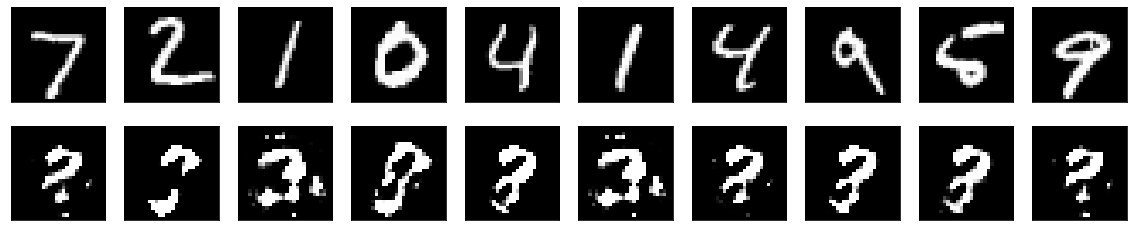

In [52]:
autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

<h4> We see that it is a grid search problem, and we have to do a grid search to find the right amount of parameters. Also we notice that in the case of using 50 epochs with single layer, we are getting the lowest loss value in the final epoch.

<h4> Question 4:

In [64]:
autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/5
235/235 [==============================] - 4s 16ms/step - loss: 0.2151 - val_loss: 0.2150
Epoch 2/5
235/235 [==============================] - 4s 17ms/step - loss: 0.2243 - val_loss: 0.2208
Epoch 3/5
235/235 [==============================] - 4s 16ms/step - loss: 0.2191 - val_loss: 0.2143
Epoch 4/5
235/235 [==============================] - 4s 16ms/step - loss: 0.2093 - val_loss: 0.2047
Epoch 5/5
235/235 [==============================] - 4s 16ms/step - loss: 0.2036 - val_loss: 0.2020


In [65]:
(x_train, _), (x_test, _) = cifar10.load_data()
x_train = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in x_train])
x_test = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in x_test])
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
x_train1 = x_train[:,:784]
x_test1 = x_test[:,:784]
print(x_train.shape)
print(x_test.shape)

(50000, 1024)
(10000, 1024)


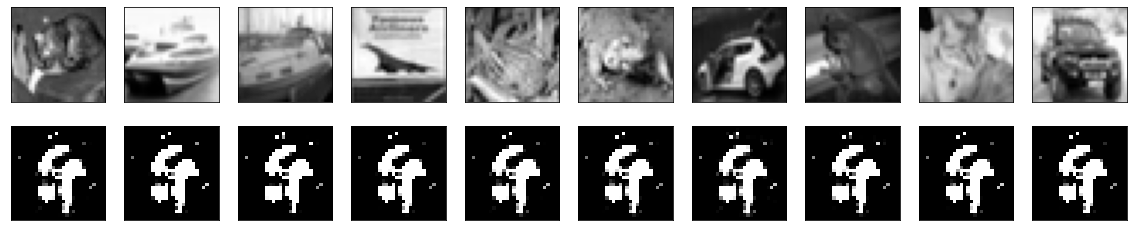

In [66]:
encoded_imgs = encoder.predict(x_test1)
decoded_imgs = decoder.predict(encoded_imgs)

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(32, 32))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

<h4> Here we can see that the plot gives anomalous images. We can also set a threshold (for example if the loss is greater than 0.2, then we can classify the image as anomalous)